In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\unsupervised_learning_dataset.csv")

In [3]:
df.drop(columns = ['CustomerID','Genre'],inplace = True)

In [4]:
df.rename(columns = {"Annual Income (k$)":'income','Spending Score (1-100)':'spending'},inplace = True)

In [7]:
df.head()

,Age,income,spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [14]:
# Finding optimal parameters for DBSCAN
for r in range(1, 10):
    for m in range(3, 10):
        from sklearn.cluster import DBSCAN
        dbs = DBSCAN(eps=r, min_samples=m)
        df["db_cluster"] = dbs.fit_predict(df)

        if df["db_cluster"].nunique() == 5:
            break
print("eps:", r)
print("min:", m)

eps: 9
min: 9


In [17]:
# Applying DBSCAN with selected parameters
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=8, min_samples=9)
df["db_cluster"] = dbs.fit_predict(df)

In [19]:
# Viewing unique cluster labels
df["db_cluster"].unique()

array([-1,  0,  1,  2])

In [22]:
df

,Age,income,spending,db_cluster
0,19,15,39,-1
1,21,15,81,-1
2,20,16,6,-1
3,23,16,77,-1
4,31,17,40,-1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


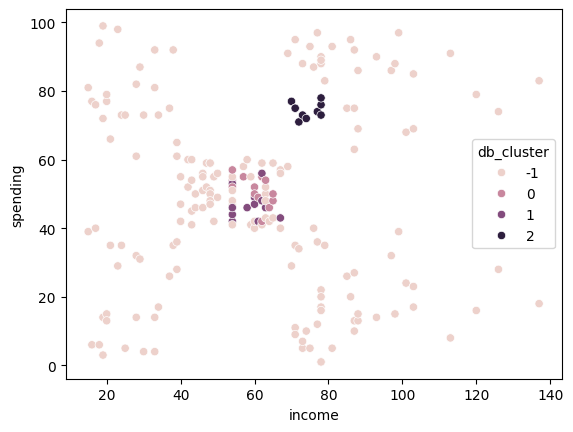

In [23]:
# Plotting the clusters
sns.scatterplot(x="income", y="spending", hue="db_cluster", data=df)
plt.show()